In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("IMDb.csv", parse_dates=["Year"]) 

In [3]:
df.head() 

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022-01-01,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008-01-01,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003-01-01,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010-01-01,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002-01-01,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [38]:
df[df["Rating"]==df.Rating.max()]

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022-01-01,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,0.00,Action,"Adventure, Drama"
3448,The Shawshank Redemption,1994-01-01,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,142,A,28.34,Drama,Drama


# According to IMDb Kantara(2022) and The shawshank Redemption (1994) are the highest rated movies of all time

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Movie_Title    5562 non-null   object        
 1   Year           5562 non-null   datetime64[ns]
 2   Director       5562 non-null   object        
 3   Actors         5562 non-null   object        
 4   Rating         5562 non-null   float64       
 5   Runtime(Mins)  5562 non-null   int64         
 6   Censor         5562 non-null   object        
 7   Total_Gross    5562 non-null   object        
 8   main_genre     5562 non-null   object        
 9   side_genre     5562 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 434.7+ KB


In [5]:
import numpy as np

In [6]:
def gross(string):
    if string.startswith("$"):
        temp= string.strip("$M")
        return float(temp)
    else:
        return np.nan
    

In [7]:
df["Total_Gross"]=df["Total_Gross"].apply(gross) 

In [8]:
df.dtypes

Movie_Title              object
Year             datetime64[ns]
Director                 object
Actors                   object
Rating                  float64
Runtime(Mins)             int64
Censor                   object
Total_Gross             float64
main_genre               object
side_genre               object
dtype: object

In [31]:
df["Total_Gross"].fillna(0, inplace=True) 

In [34]:
Gross_df=df.groupby("Year")["Total_Gross"].sum().reset_index(name="Yearly_gross") 

<IPython.core.display.Javascript object>


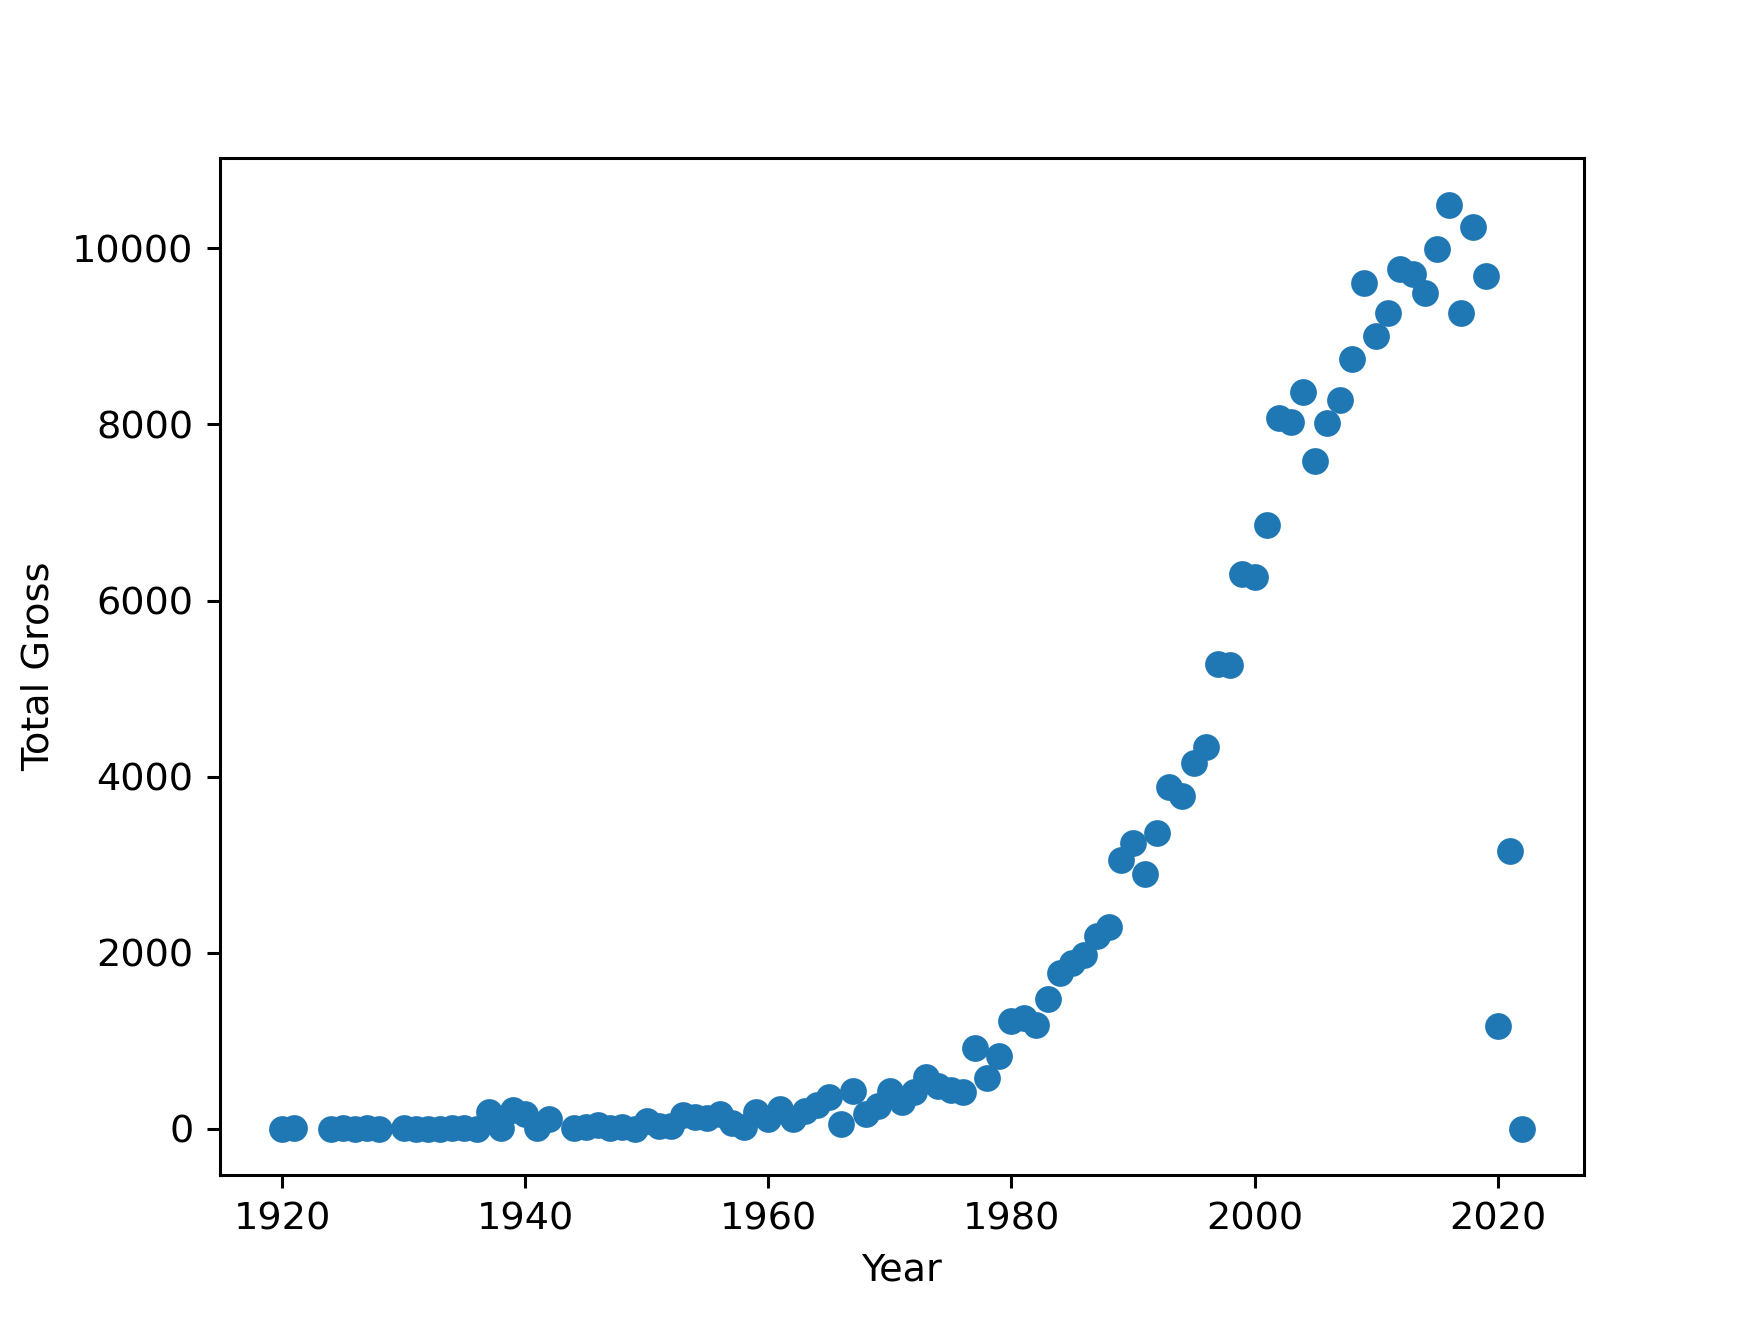

In [36]:
plt.scatter(x=Gross_df["Year"], y=Gross_df["Yearly_gross"]) 
plt.xlabel("Year") 
plt.ylabel("Total Gross") 
plt.show()

# After 1960's there is an exponential rise in the revenue generated by movies. 

In [9]:
duration_df=df.groupby("Year")["Runtime(Mins)"].mean().reset_index(name="Avg_runtime") 

In [10]:
duration_df

,Year,Avg_runtime
0,1920-01-01,76.000000
1,1921-01-01,68.000000
2,1924-01-01,45.000000
3,1925-01-01,85.000000
4,1926-01-01,67.000000
...,...,...
94,2018-01-01,114.538462
95,2019-01-01,115.438889
96,2020-01-01,111.298246
97,2021-01-01,122.027027


<IPython.core.display.Javascript object>


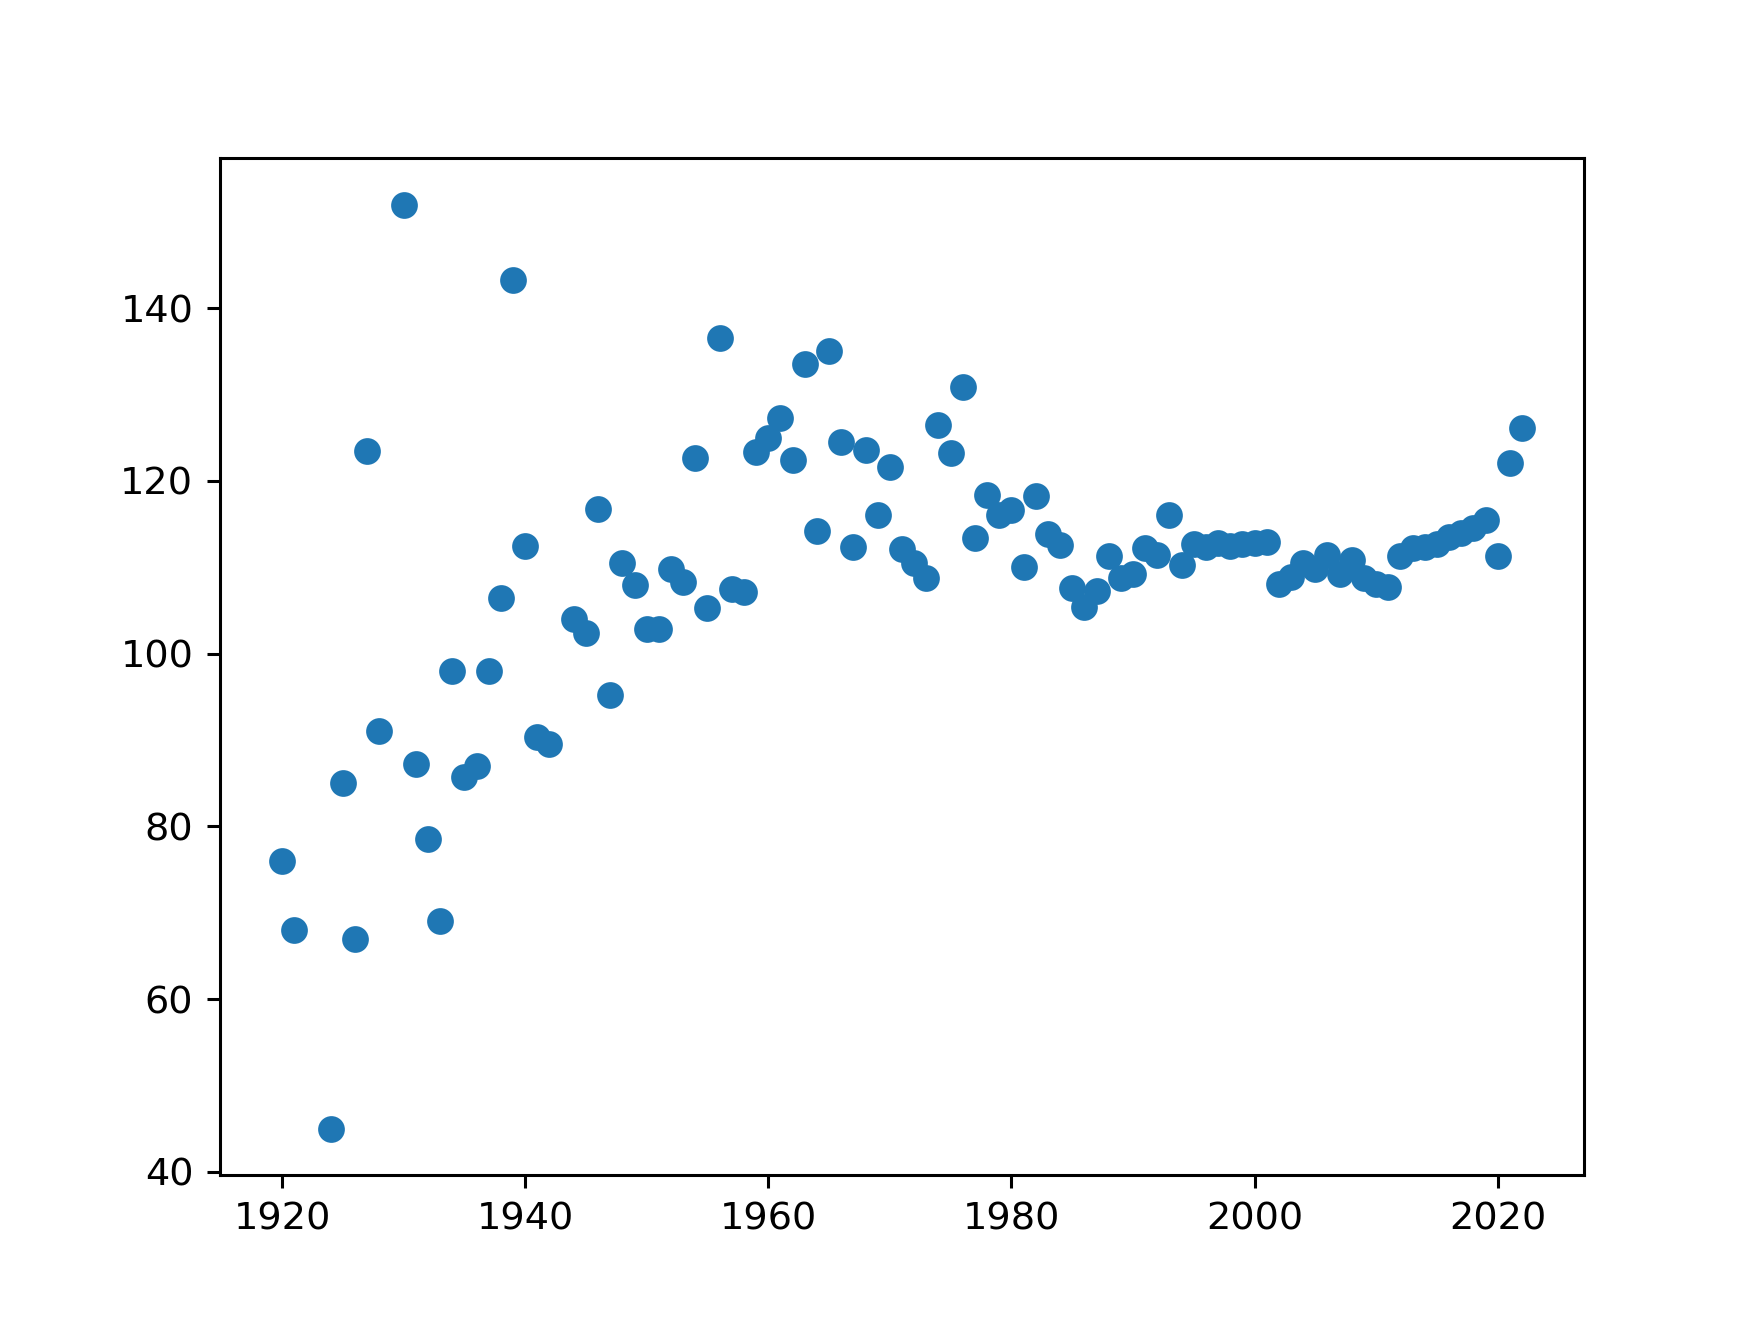

In [27]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
plt.scatter(x=duration_df["Year"], y=duration_df["Avg_runtime"])  
plt.show() 

# After early 1980's the average runtime of movies is almost constant to around 110 minutes where as there was a gradual rise in the average runtime of movies between 1920's to late 1970's

In [12]:
director_df=df.groupby("Director")["Rating"].mean().reset_index(name="Avg_rating")

In [13]:
director_df

,Director,Avg_rating
0,A.L. Vijay,5.900
1,A.R. Murugadoss,7.625
2,Aanand L. Rai,6.700
3,Aaron Schneider,7.000
4,Aaron Sorkin,7.200
...,...,...
2315,Álex de la Iglesia,6.200
2316,Çagan Irmak,8.200
2317,Éric Lartigau,7.300
2318,Ömer Faruk Sorak,7.700


## Average rating of Directors who have more than 5 films 

In [14]:
director_df=director_df.loc[(df.groupby("Director")["Director"].count()>5).values]

In [15]:
director_df.sort_values(by="Avg_rating", ascending=False, inplace=True)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<h1 style="color:red;">Top 10 Directors with highest average ratings</h1>

In [26]:
director_df.head(10) 

,Director,Avg_rating
280,Charles Chaplin,8.333333
2021,Sergio Leone,8.216667
34,Akira Kurosawa,8.200000
326,Christopher Nolan,8.154545
2064,Stanley Kubrick,8.080000
1032,Ingmar Bergman,8.077778
197,Billy Wilder,8.030000
88,Andrei Tarkovsky,8.016667
1810,Quentin Tarantino,8.000000
998,Hayao Miyazaki,7.972727


<IPython.core.display.Javascript object>


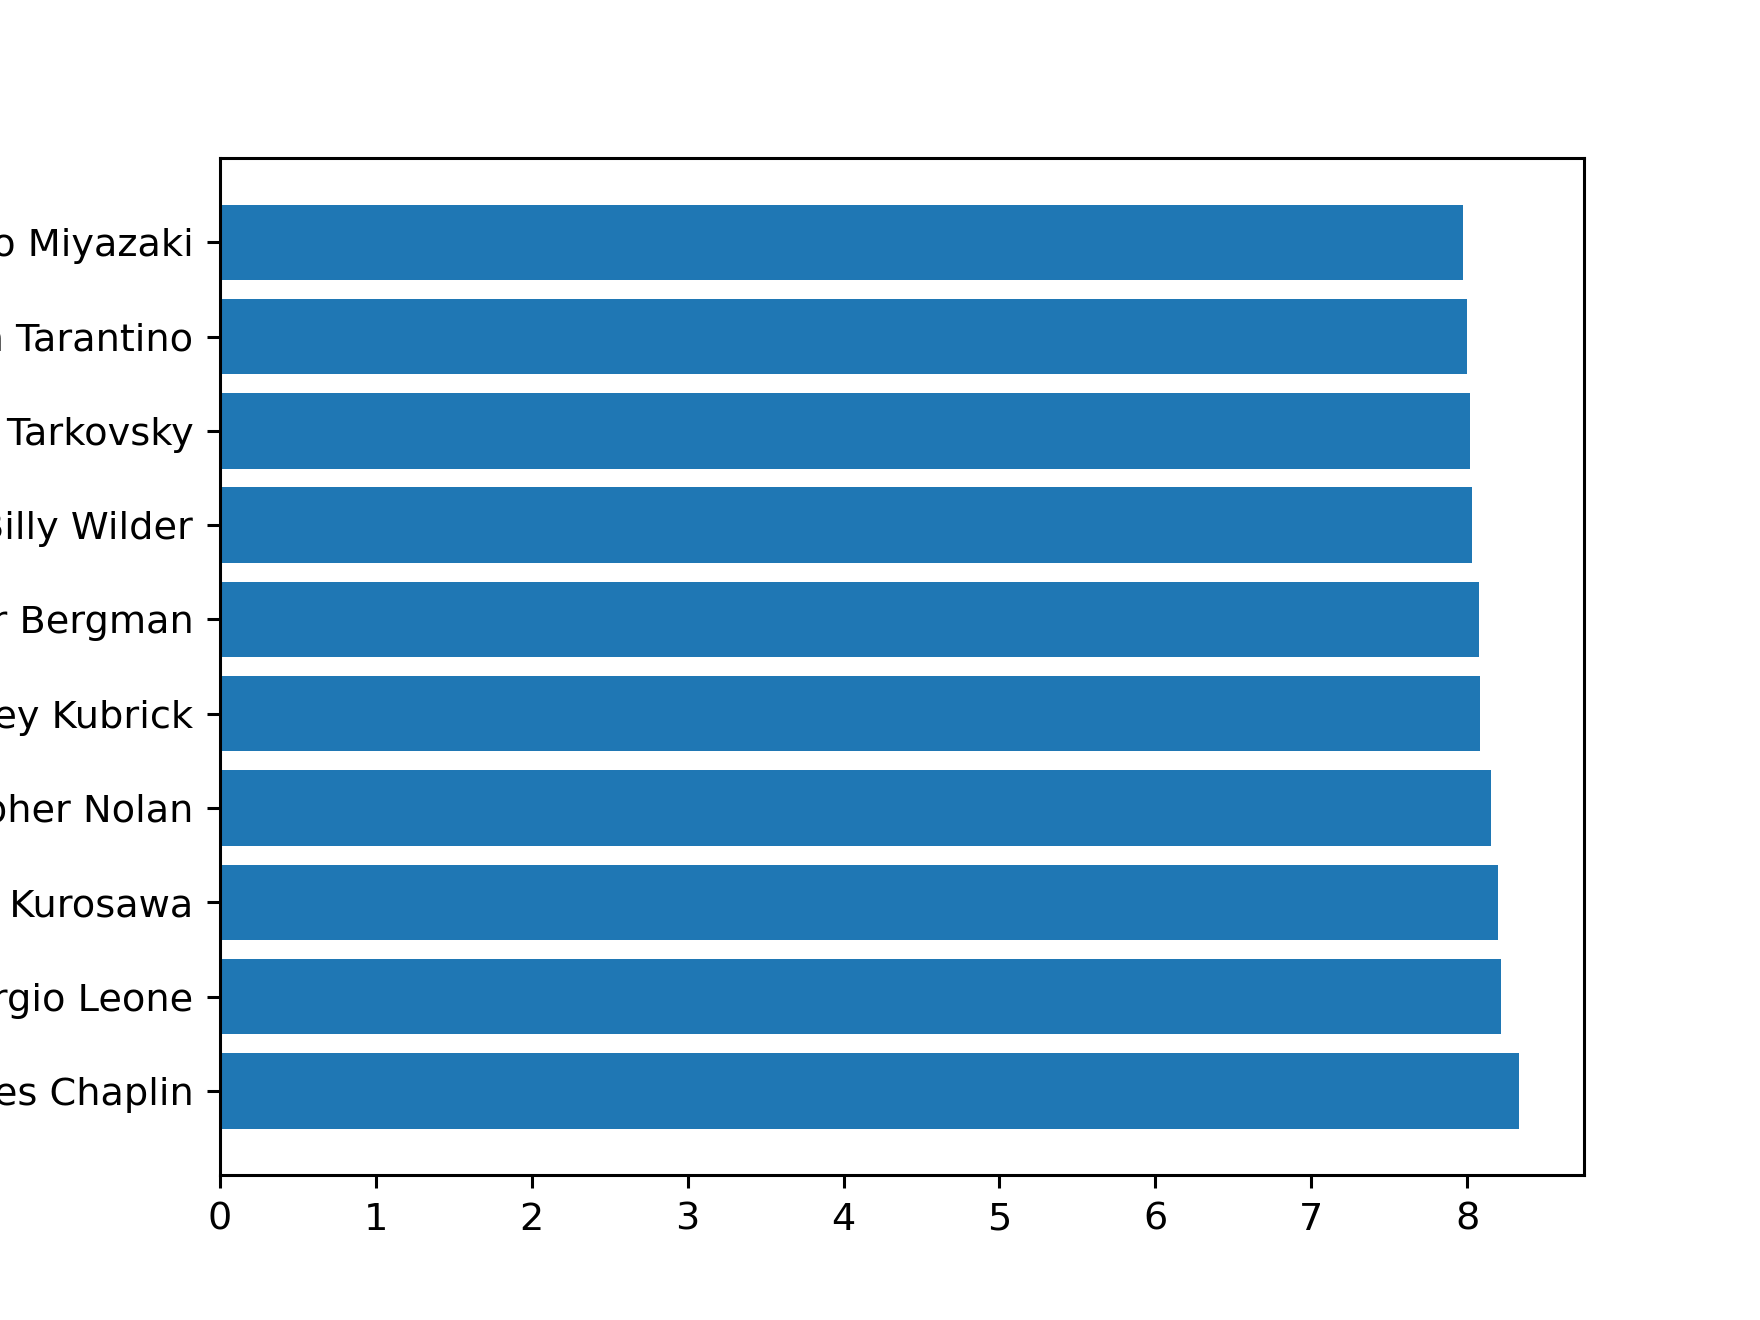

<BarContainer object of 10 artists>

In [22]:
plt.barh(director_df["Director"].head(10) , director_df["Avg_rating"].head(10)) 

# Highest average rating is of charles chaplin aka Charlie Chaplin, follow by Sergio leone, Akira Kurosawa, Christopher Nolan and several other great directors

In [18]:
df["main_genre"].value_counts() 

Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: main_genre, dtype: int64

# Action, Comedy and Drama movies have dominated as compared to other genres

# Average Gross by genre

In [23]:
df.groupby("main_genre")["Total_Gross"].mean() 

main_genre
Action        76.873409
Adventure     59.640760
Animation    110.308029
Biography     35.146556
Comedy        41.899069
Crime         27.989859
Drama         31.020217
Fantasy       48.456364
Film-Noir      3.983333
Horror        45.160185
Musical             NaN
Mystery       35.974211
Western       16.165000
Name: Total_Gross, dtype: float64

# It is observed that Animation has the highest average among all other genres followed by Action genre

In [24]:
df.groupby("main_genre")["Rating"].median() 

main_genre
Action       6.50
Adventure    6.90
Animation    7.10
Biography    7.20
Comedy       6.60
Crime        7.10
Drama        7.20
Fantasy      5.80
Film-Noir    7.50
Horror       6.10
Musical      7.00
Mystery      7.25
Western      8.10
Name: Rating, dtype: float64

# Western genre movies have highest median ratings followed by Mystery and Drama movies

In [40]:
df["Censor"].value_counts() 

UA           1118
A            1101
U            1023
R             926
Not Rated     495
PG-13         405
18            136
PG            120
16             71
13             53
UA 16+         22
15+            18
7              17
UA 13+         12
G               9
(Banned)        8
UA 7+           7
12+             5
All             5
Unrated         4
U/A             2
18+             2
12              1
M/PG            1
NC-17           1
Name: Censor, dtype: int64

# Directors with the highest revenue

In [46]:
df.groupby("Director")["Total_Gross"].sum().sort_values(ascending=False).head(5)  

Director
Steven Spielberg                      3745.97
Michael Bay                           2326.51
Directors:Anthony Russo, Joe Russo    2280.67
J.J. Abrams                           2199.40
Robert Zemeckis                       2075.94
Name: Total_Gross, dtype: float64

# The above are the directors with the highest revenue. 
# *Note*: Not even one of the 5 directors are in the list of Top 10 rated directors. 